# Cборный проект

## Описание проекта и данных

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Предоставлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка и изучение данных

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

Считаем файл с данными о играх и сохраним его в переменную `games`.

In [2]:
games = pd.read_csv('games_info.csv')

Выведем на экран первые 10 строк таблицы `games`.

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общую информацию о таблице `games`.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Типы данных во всех столбцах таблицы, за исключением одного, приемлемы для дальнейшей работы с данными из них. Поменять тип данных необходимо в столбце `User_Score` на числовой тип `float`, так как данные из это столбца содержат средную оценку пользователей и с ней надо будет работать как с числовой переменной.

Проверим количество пропусков в столбцах таблицы `games`.

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Первые пропуски есть в столбцах `Name` и `Genre`. Скорее всего эти пропуски содержатся в одних и тех же строках. Проверим это. 

In [6]:
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, эти пропуски содержатся в строках 659 и 14244. В дальнейшем эти строки нужно будет удалить. 

Также пропуски содержатся в столбце `Year_of_Release`. Годы выпусков некоторых игр могли быть не указаны в открытых источниках. 

Остальные пропуски содержатся в столбцах с рейтингами `Critic_Score`, `User_Score` и `Rating`. Возможно, эти данные также не содержались в открытых источниках. Не исключено, что наличие пропусков может объясняться и техническими причинами (проблемами при загрузке и выгрузке данных).

Проверим таблицу `games` на строки-дубликаты.

In [7]:
games.duplicated().sum()

0

Строк-дубликатов в исследуемой таблице нет.

## Подготовка данных

Заменим названия столбцов таблицы `games`. Приведём их всех к нижнему регистру.

In [8]:
games.columns = map(str.lower, games.columns)

Проверим изменённые названия столбцов таблицы.

In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия всех столбцов приведены к нижнему регистру.

Заменим тип данных в столбце `user_score` на `float`. Это необходимо, так как в этом столбце содержатся дробные числа, отображающие среднюю оценку пользователей. Без соответствующей замены в дальнейшем невозможно будет корректно работать с числами из этого столбца.

В столбце `user_score` также содержатся ячейки с фразой `tbd`-`to be decided`. Все эти оценки неизвестны и поэтому можно заменить их пропусками.

In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') 

Удалим строки из таблицы `games`, в которых не указаны названия игр и их жанр.

In [11]:
games = games.dropna(subset=['name', 'genre']) 

В столбце `year_of_release` пропуски можно оставить. 

В столбцах `critic_score` и `user_score` пропуски можно оставить. 

В столбце `rating` пропуски можно оставить. Заменить их на основании данных из других столбцов таблицы `games` не представляется возможным.

Посчитаем суммарные продажи копий игр во всех регионах и добавим эти данные в новый столбец `all_sales`.

In [12]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Выберем из таблицы `games` только столбцы с названием игры, годом релиза и платформой.

In [13]:
games_part = games[['name','platform','year_of_release']]

Найдем все строки-дубликаты в таблице `games_part`. Они и будут относиться к неявным дубликатам.

In [14]:
games_part.duplicated().sum()

1

Всего один неявный дубликат на всю таблицу. Узнаем, что же это за игра.

In [15]:
games_part_dup = games_part.duplicated()

In [16]:
games_part_dup[games_part_dup==True]

16230    True
dtype: bool

In [17]:
games_part[games_part.index == 16230]

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012.0


Итак, это игра `Madden NFL 13`. Удостоверимся, что эта игра действительно вписана в таблицу `games` с одной и той же платформой и годом релиза несколько раз.

In [18]:
games[games['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Действительно, эта игра на платформу `PS3` с годом релиза 2012 вписана в таблицу `games` дважды. Удалим из таблицы `games` строку 16230.

In [19]:
games = games[games.index != 16230]

Восстановим порядок индексов в таблице `games`.

In [20]:
games = games.reset_index(drop=True)

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

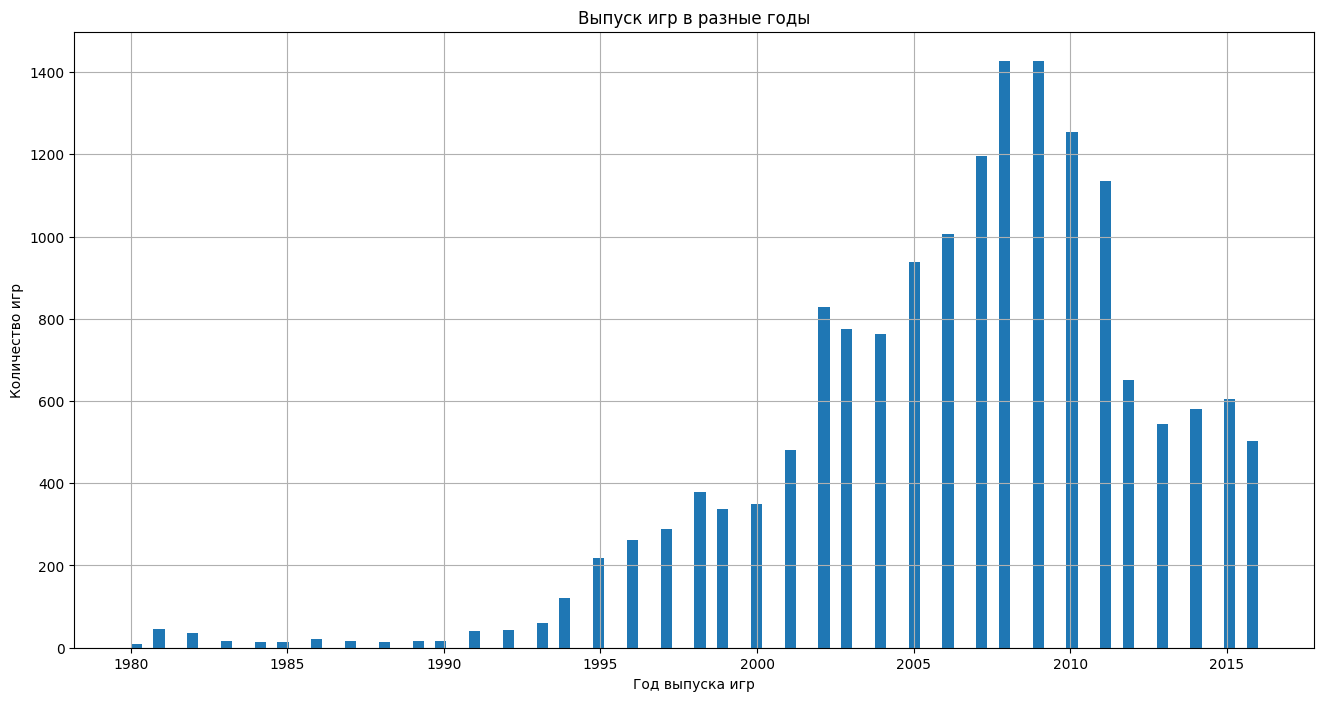

In [21]:
figure_1 = games['year_of_release'].hist(bins=100,figsize=(16,8))
figure_1.set(xlabel='Год выпуска игр',ylabel='Количество игр',title='Выпуск игр в разные годы');

Больше всего игр выпускалось в 2008 и в 2009 году. Данные за период от 1980 до 1995 года не важны, так как за этот период игр выпускалось не много.

**Посмотрим, как менялись продажи по платформам.**

Определим платформы с наибольшими суммарными продажами. Для этого создадим сводную таблицу.

In [22]:
all_sales_top = games.pivot_table(index='platform',values='all_sales',aggfunc='sum').sort_values('all_sales',ascending=False)

Выведем на экран топ 10 платформ с наибольшими суммарными продажами копий игр.

In [23]:
all_sales_top.head(10)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Построим столбчатую диаграмму для наглядности.

In [24]:
all_sales_top = all_sales_top.head(10)

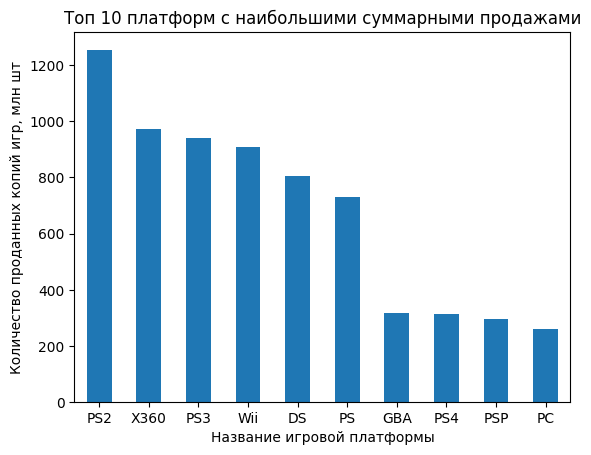

In [25]:
all_sales_top.plot.bar(
    y='all_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 10 платформ с наибольшими суммарными продажами'
);

На примере платформ PS2, PS3 и X360 посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

Для этого построим распределение суммарных продаж по годам для этих платформ.

Выделим только те строки из таблицы `games`, в которых содержится информация о суммарных продажах для необходимых платформ.

In [26]:
ps2_data = games[games['platform']=='PS2']
ps3_data = games[games['platform']=='PS3']
x360_data = games[games['platform']=='X360']

Создадим сводные таблицы для хранения данных, по которым будем визуализировать распределения.

In [27]:
ps2_distr = ps2_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
ps3_distr = ps3_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
x360_distr = x360_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')

Поменяем тип отображения года с XXXX.0 на XXXX. Для этого изменим тип данных в соответсвтующих столбцах на `integer`.

In [28]:
ps2_distr.index = ps2_distr.index.astype(int)
ps3_distr.index = ps3_distr.index.astype(int)
x360_distr.index = x360_distr.index.astype(int)

Построим распределения суммарных продаж по годам для характерных игровых платформ.

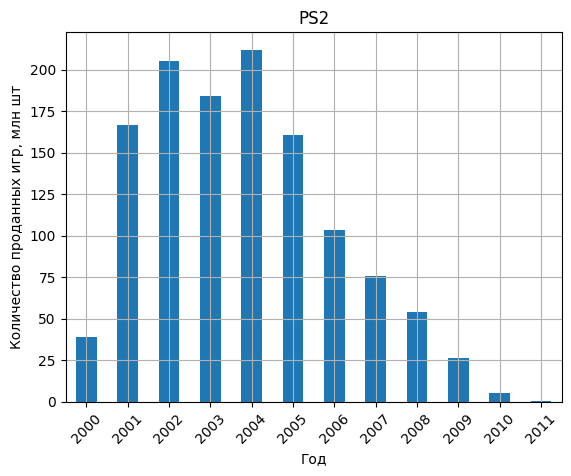

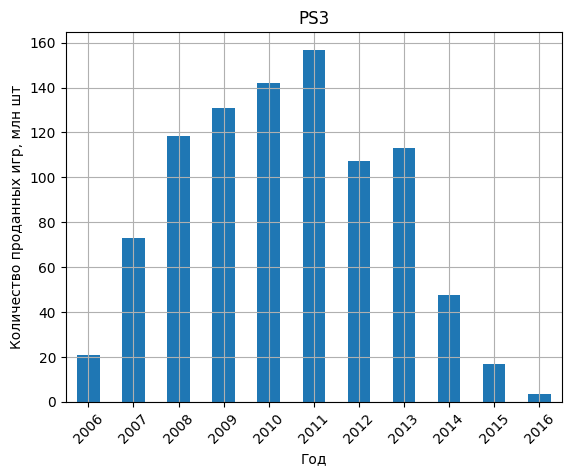

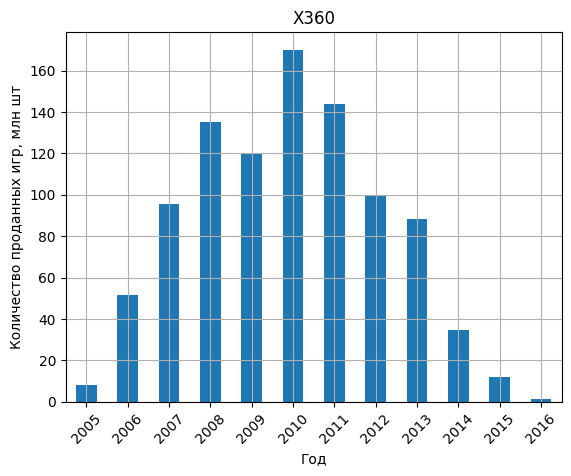

In [29]:
ps2_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='PS2',grid=True
);
ps3_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='PS3',grid=True
);
x360_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='X360',grid=True
);

Заметно, что каждая из этих платформ проходит стадии появления, набора популярности и угасания популярности.

Учитывая, что платформы развиваются и достигают пика приблизительно за 4 года, актуальным периодом можно считать период с 2013 по 2016 год.

Создадим новую таблицу с актуальными данными.

In [30]:
actual_games_data = games[games['year_of_release'] >= 2013]

Определим на основании актуальных данных, какие платформы лидируют по продажам. Создадим сводную таблицу.

In [31]:
all_sales_top_actual = actual_games_data.pivot_table(
    index='platform',values='all_sales',aggfunc='sum'
).sort_values('all_sales',ascending=False).head()

**Посмотрим на топ-5 лидирующих по продажам игровых платформ.**

In [32]:
all_sales_top_actual

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Визуализируем топ-5 с помощью столбчатой диаграммы.

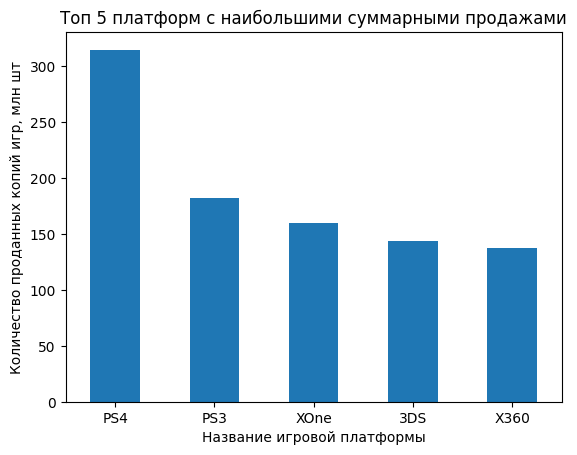

In [33]:
all_sales_top_actual.plot.bar(
    y='all_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 платформ с наибольшими суммарными продажами'
);

Определим растут или падают продажи среди платформ: PS4, PS3, XOne.

Выделим только те строки из таблицы `actual_games_data`, в которых содержится информация о суммарных продажах для необходимых платформ.

In [34]:
ps4_data = actual_games_data[actual_games_data['platform']=='PS4']
ps3_data = actual_games_data[actual_games_data['platform']=='PS3']
xone_data = actual_games_data[actual_games_data['platform']=='XOne']

Создадим сводные таблицы для хранения данных, по которым будем визуализировать распределения.

In [35]:
ps4_distr = ps4_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
ps3_distr = ps3_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
xone_distr = xone_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')

Поменяем тип отображения года с XXXX.0 на XXXX. Для этого изменим тип данных в соответсвтующих столбцах на `integer`.

In [36]:
ps4_distr.index = ps4_distr.index.astype(int)
ps3_distr.index = ps3_distr.index.astype(int)
xone_distr.index = xone_distr.index.astype(int)

Построим распределения суммарных продаж по годам для характерных игровых платформ.

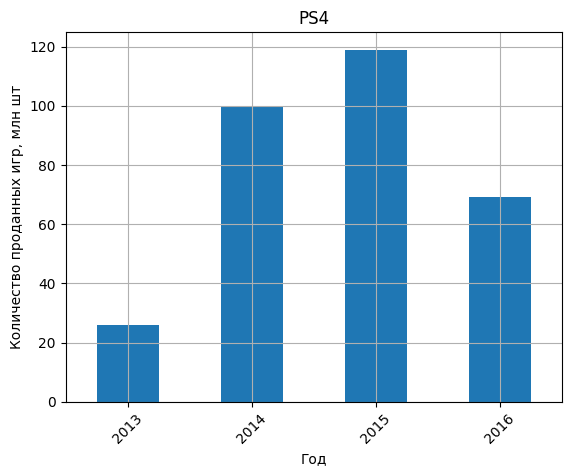

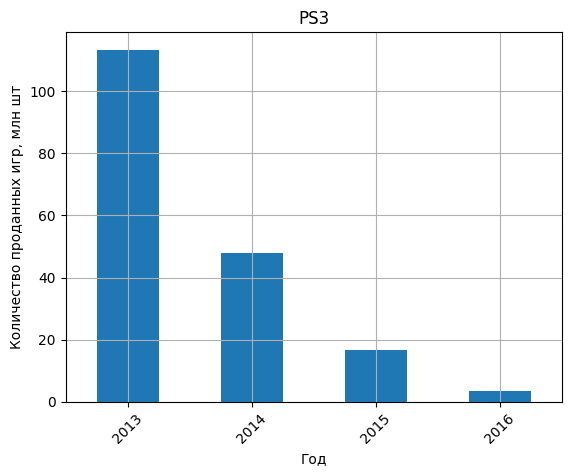

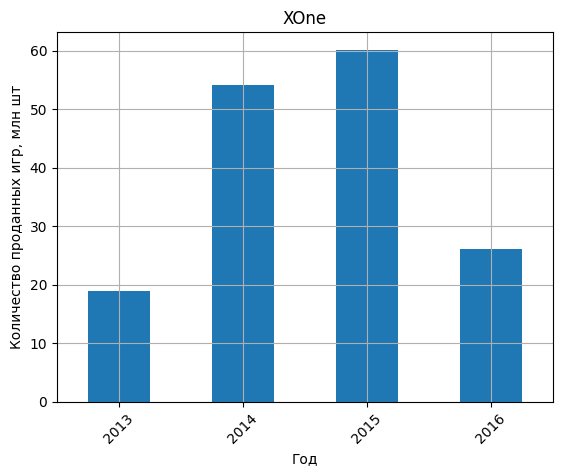

In [37]:
ps4_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='PS4',grid=True
);
ps3_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='PS3',grid=True
);
xone_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='XOne',grid=True
);

Продажи платформы `PS3` к 2016 году сильно падают, а продажи платформ `PS4` и `XOne` растут.

**Определим платформы с наибольшим числом продаж за последние 3 года.**

In [38]:
actual_games_data_14_16 = actual_games_data[actual_games_data['year_of_release']>=2014]

In [39]:
all_sales_top_actual_14_16 = actual_games_data_14_16.pivot_table(
    index='platform',values='all_sales',aggfunc='sum'
).sort_values('all_sales',ascending=False).head()

In [40]:
all_sales_top_actual_14_16

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Визуализируем топ-5 с помощью столбчатой диаграммы.

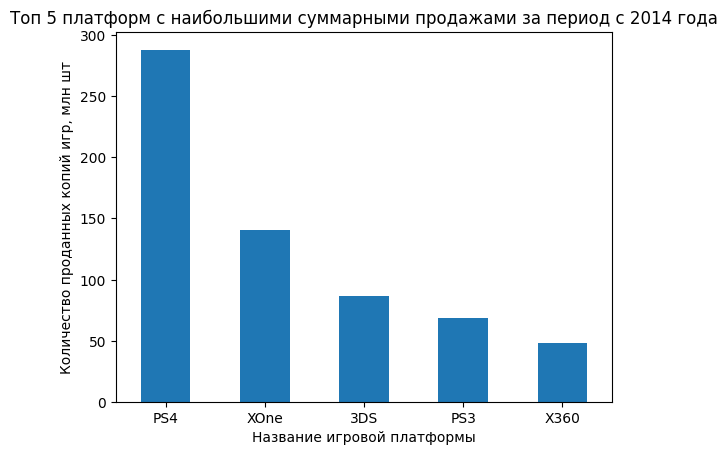

In [41]:
all_sales_top_actual_14_16.plot.bar(
    y='all_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 платформ с наибольшими суммарными продажами за период с 2014 года'
);

Проверим, являются ли продажи платформ PS4, XOne и 3DS растущими.

In [42]:
xone_data = actual_games_data_14_16[actual_games_data_14_16['platform']=='XOne']
ps4_data = actual_games_data_14_16[actual_games_data_14_16['platform']=='PS4']
ds3_data = actual_games_data_14_16[actual_games_data_14_16['platform']=='3DS']

In [43]:
xone_distr = xone_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
ps4_distr = ps4_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')
ds3_distr = ds3_data.pivot_table(index='year_of_release',values='all_sales',aggfunc='sum')

In [44]:
xone_distr.index = xone_distr.index.astype(int)
ps4_distr.index = ps4_distr.index.astype(int)
ds3_distr.index = ds3_distr.index.astype(int)

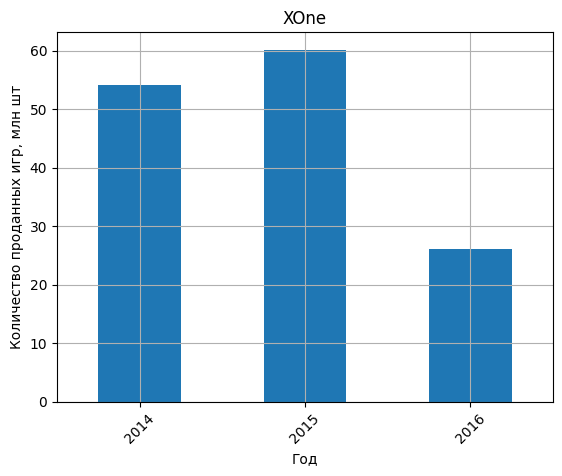

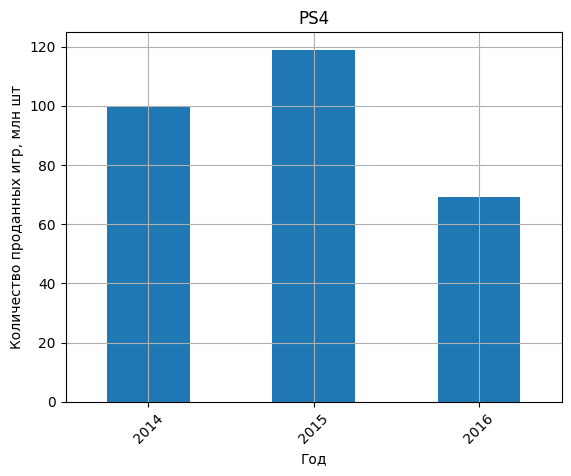

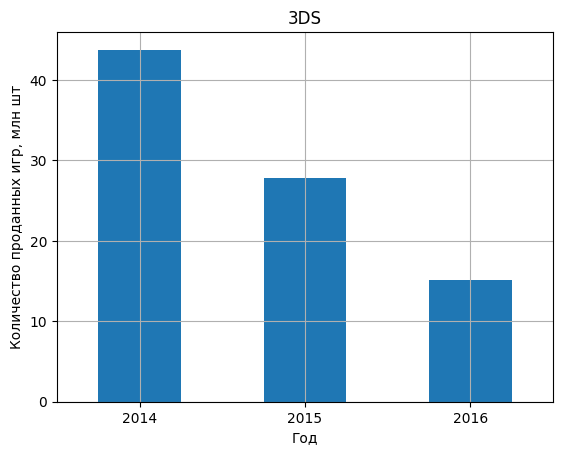

In [45]:
xone_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='XOne',grid=True
);
ps4_distr.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='PS4',grid=True
);
ds3_distr.plot.bar(
    y='all_sales',legend=False,rot=0,xlabel='Год',ylabel='Количество проданных игр, млн шт',title='3DS',grid=True
);

Учитывая, что данные за 2016 год могут быть неполными, платформы XOne и PS4 явно лидируют по продажам и растут.

Итак, потенциально прибыльные платформы - XOne и PS4.

**Построим диаграмму размаха для глобальных продаж игр для нескольких платформ.**

Начнем с платформы XOne.

In [46]:
actual_games_data_for_xone = actual_games_data[actual_games_data['platform']=='XOne']

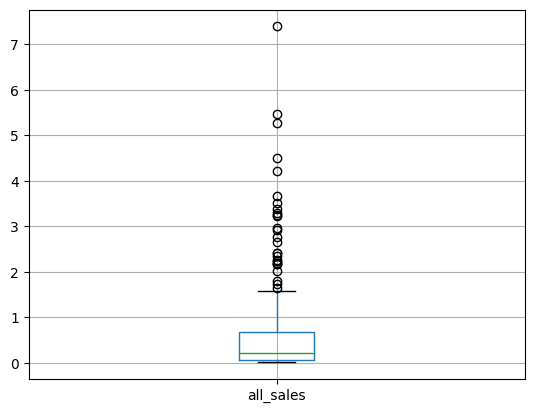

In [47]:
actual_games_data_for_xone.boxplot('all_sales');

Заметно, что присутствуют выбросы сверху. Есть аномально большие значения проданных глобально копий игр для платформы XOne.

Перейдем к платформе PS4.

In [48]:
actual_games_data_for_ps4 = actual_games_data[actual_games_data['platform']=='PS4']

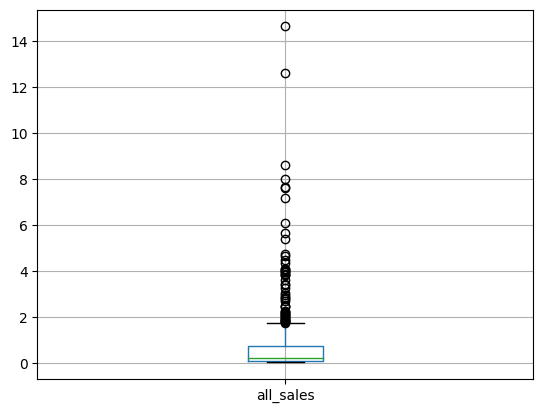

In [49]:
actual_games_data_for_ps4.boxplot('all_sales');

Также видно, что присутствуют выбросы сверху. Есть аномально большие значения проданных глобально копий игр для платформы PS4.

In [50]:
actual_games_data_for_ds3 = actual_games_data[actual_games_data['platform']=='3DS']

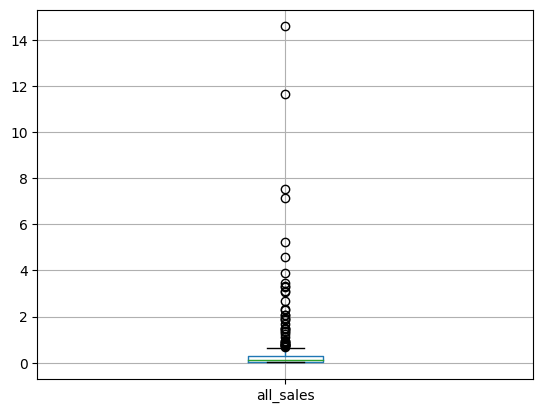

In [51]:
actual_games_data_for_ds3.boxplot('all_sales');

Ситуация таже. Присутствуют выбросы сверху. Есть аномально большие значения проданных глобально копий игр для платформы 3DS. 

Для каждой из платформ есть такие игры, которые имеют на фоне других очень большое количество проданных глобально копий.

Построим для всех существующих платформ график с диаграммами размаха.

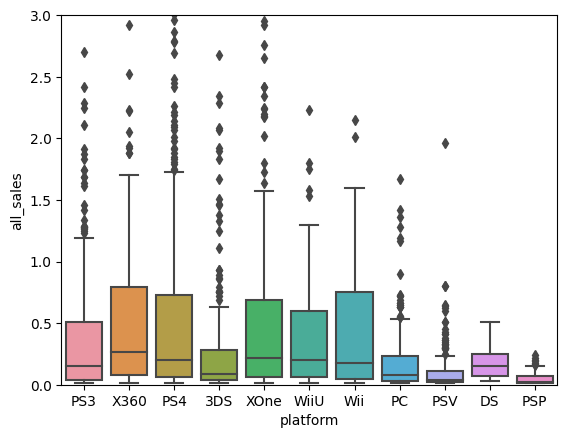

In [107]:
sns.boxplot(data=actual_games_data, x='platform', y='all_sales');
plt.ylim(0,3);

**Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы. Этой платформой будет Xbox One.**

Построим диаграмму рассеяния для пары переменных (отзыв критиков, суммарные продажи).

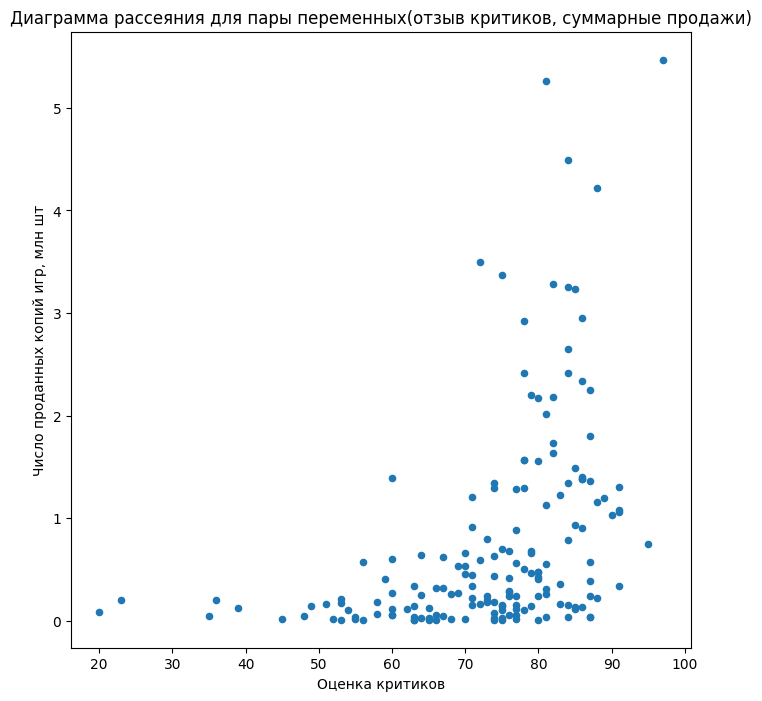

In [55]:
xone_data.plot(
    x='critic_score', y='all_sales',kind='scatter',xlabel='Оценка критиков',ylabel='Число проданных копий игр, млн шт',
    title='Диаграмма рассеяния для пары переменных(отзыв критиков, суммарные продажи)',figsize=(8,8)
);

Рассчитаем коэффициент корреляции между отзывом критиков и суммарными продажами.

In [56]:
xone_data['critic_score'].corr(xone_data['all_sales'])

0.41699832800840186

Полученный коэффициент корреляции говорит о слабой положительной связи.

Построим диаграмму рассеяния для пары переменных (отзыв пользователей, суммарные продажи).

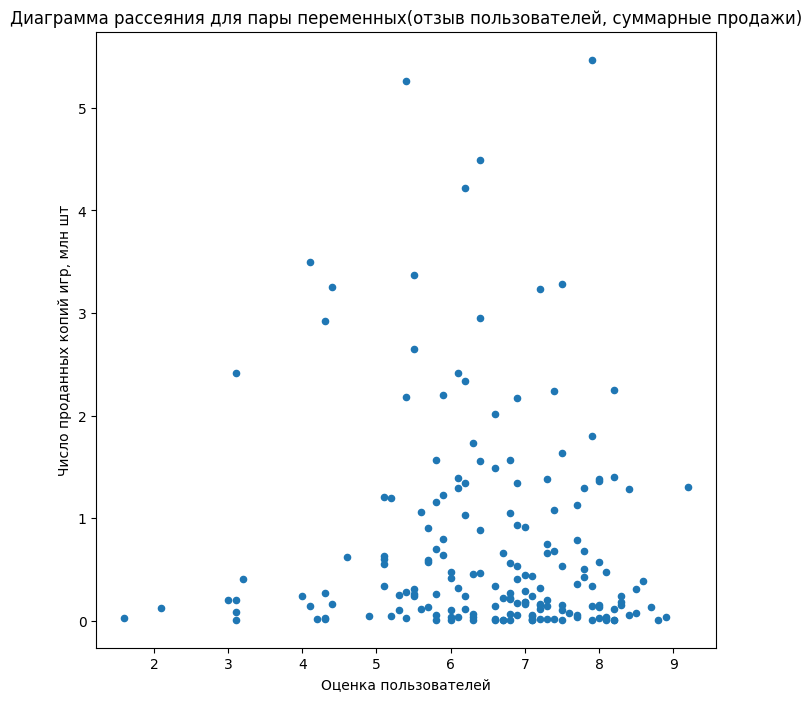

In [57]:
xone_data.plot(
    x='user_score', y='all_sales',kind='scatter',xlabel='Оценка пользователей',ylabel='Число проданных копий игр, млн шт',
    title='Диаграмма рассеяния для пары переменных(отзыв пользователей, суммарные продажи)',figsize=(8,8)
);

Рассчитаем коэффициент корреляции между отзывом пользователей и суммарными продажами.

In [58]:
xone_data['user_score'].corr(xone_data['all_sales'])

-0.06892505328279414

Полученный коэффициент корреляции говорит об отсутствии связи между этими величинами.

Таким образом, чем выше оценка критиков, тем больше продаж. Суммарные продажи не зависят от оценки пользователей.

**Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри платформы PS4.**

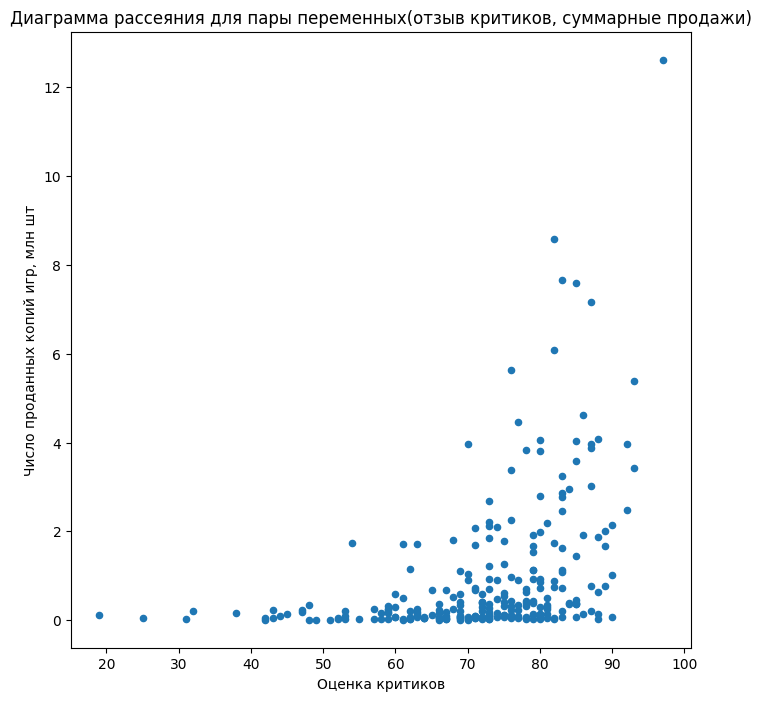

In [59]:
actual_games_data_for_ps4.plot(
    x='critic_score', y='all_sales',kind='scatter',xlabel='Оценка критиков',ylabel='Число проданных копий игр, млн шт',
    title='Диаграмма рассеяния для пары переменных(отзыв критиков, суммарные продажи)',figsize=(8,8)
);

Рассчитаем коэффициент корреляции между отзывом критиков и суммарными продажами.

In [60]:
actual_games_data_for_ps4['critic_score'].corr(actual_games_data_for_ps4['all_sales'])

0.40656790206178095

И вновь полученный коэффициент корреляции говорит о наличии слабой положительной связи.

Построим диаграмму рассеяния для пары переменных (отзыв пользователей, суммарные продажи).

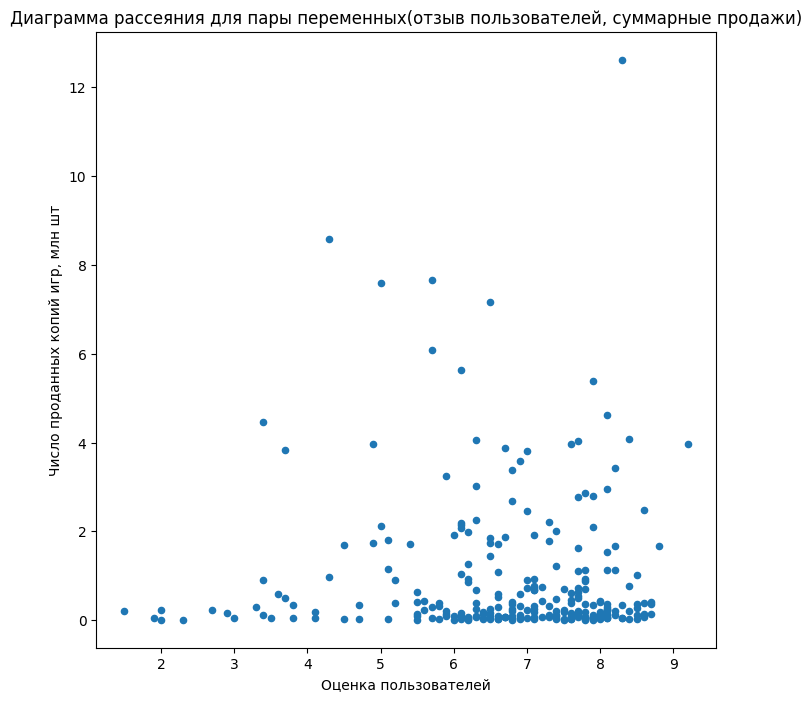

In [61]:
actual_games_data_for_ps4.plot(
    x='user_score', y='all_sales',kind='scatter',xlabel='Оценка пользователей',ylabel='Число проданных копий игр, млн шт',
    title='Диаграмма рассеяния для пары переменных(отзыв пользователей, суммарные продажи)',figsize=(8,8)
);

Рассчитаем коэффициент корреляции между отзывом пользователей и суммарными продажами.

In [62]:
actual_games_data_for_ps4['user_score'].corr(actual_games_data_for_ps4['all_sales'])

-0.03195711020455645

Всё так же. Отзывы пользователей не влияют на суммарные продажи.

Итак, действительно, чем выше оценка критиков, тем больше продаж. Суммарные продажи не зависят от оценки пользователей.

**Посмотрим на общее распределение игр по жанрам. Создадим сводную таблицу.**

In [63]:
genres_data = actual_games_data.pivot_table(
    index='genre',values='all_sales',aggfunc='sum'
).sort_values('all_sales',ascending=False)

Посмотрим на созданную таблицу.

In [64]:
genres_data

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Визуализируем распределение игр по жанрам с помощью столбчатой диаграммы.

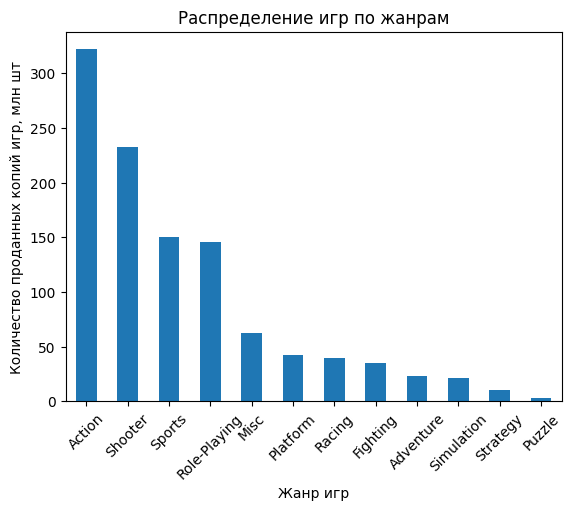

In [65]:
genres_data.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Жанр игр',ylabel='Количество проданных копий игр, млн шт',
    title='Распределение игр по жанрам'
);

Самые прибыльные жанры игр - это `Action`, `Sports` и `Shooter`. 

Жанры `Action` и `Puzzle` сильно выделяются на фоне других по количеству продаж копий игр в большую и меньшую стороны соответственно. Игры жанра `Action` продаются в очень большом количестве, а игры жанра `Puzzle` - в малом.

Проанализируем средние продажи.

Создадим сводную таблицу.

In [66]:
genres_mean_data = actual_games_data.pivot_table(
    index='genre',values='all_sales',aggfunc='mean'
).sort_values('all_sales',ascending=False)

Посмотрим на созданную таблицу.

In [67]:
genres_mean_data

,all_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


Визуализируем распределение игр по жанрам с помощью столбчатой диаграммы.

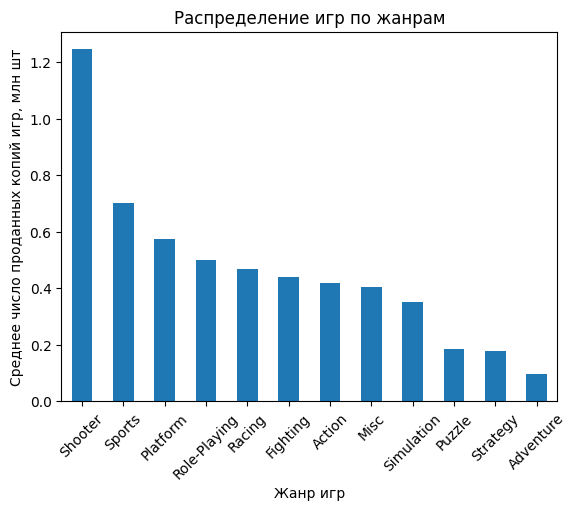

In [68]:
genres_mean_data.plot.bar(
    y='all_sales',legend=False,rot=45,xlabel='Жанр игр',ylabel='Среднее число проданных копий игр, млн шт',
    title='Распределение игр по жанрам'
);

Жанры `Shooter` и `Adventure` сильно выделяются на фоне других по среднему количеству продаж копий игр в большую и меньшую стороны соответственно. Игры жанра `Shooter` в среднем продаются лучше всего, а игры жанра `Adventure` - хуже всего.

**Составим портрет пользователя каждого из регионов EU, NA, JP.**

Начнем с Европы. Определим топ-5 самых популярных платформ.

Создадим сводную таблицу.

In [69]:
all_sales_top_eu = actual_games_data.pivot_table(
    index='platform',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [70]:
all_sales_top_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Визуализируем полученный топ-5 самых популярных в Европе игровых платформ.

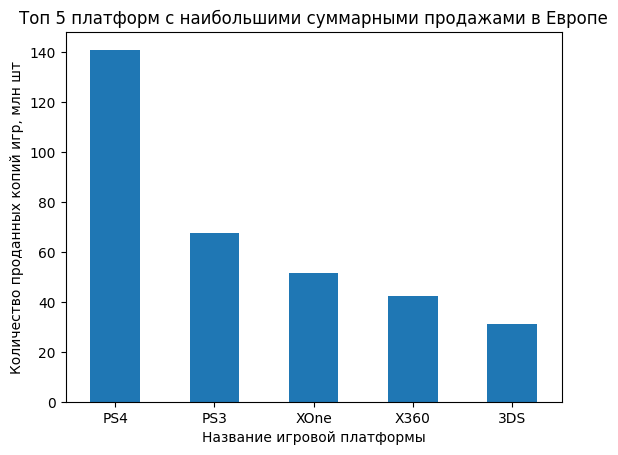

In [71]:
all_sales_top_eu.plot.bar(
    y='eu_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 платформ с наибольшими суммарными продажами в Европе'
);

В Европе больше всего продаж для платформы PS4, меньше всего для 3DS.

Определим топ-5 самых популярных жанров игр в Европе.

Создадим сводную таблицу.

In [72]:
genres_top_eu = actual_games_data.pivot_table(
    index='genre',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [73]:
genres_top_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Визуализируем полученный топ-5 самых популярных в Европе жанров игр.

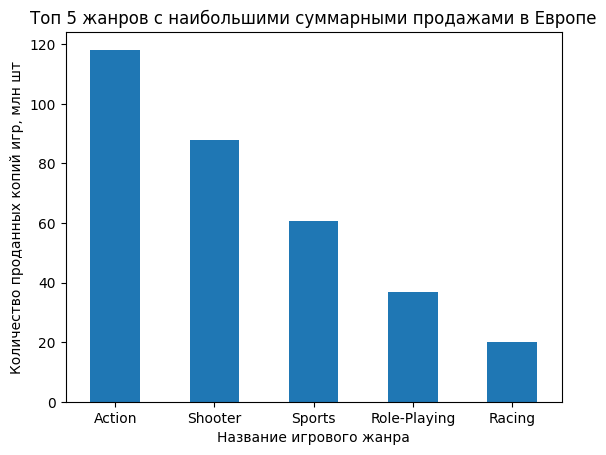

In [74]:
genres_top_eu.plot.bar(
    y='eu_sales',legend=False,rot=0,xlabel='Название игрового жанра',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 жанров с наибольшими суммарными продажами в Европе'
);

В Европе самым популярным жанром является `Action`. Последний по популярности жанр `-` `Racing`.

Итак, в Европе самая популярная платформа `-` `PS4`, а самый популярный жанр `-` `Action`. 

Отберем все игры, вышедшие на платформе `PS4` жанра `Action` с отличными от нуля продажами в Европе.

In [75]:
action_games_ps4_eu = actual_games_data[
    (actual_games_data['platform']=='PS4')&
    (actual_games_data['genre']=='Action')&
    (actual_games_data['eu_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [76]:
action_games_ps4_eu['rating'].value_counts()

T       28
M       28
E10+    13
E        4
Name: rating, dtype: int64

Больше всего оценок `M` и `T`. Такие оценки соответствуют возрастным ограничениям от 13 лет и от 17 соответственно.

Отберем теперь все игры, вышедшие на платформе `PS3` жанра `Action` с отличными от нуля продажами в Европе.

In [77]:
action_games_ps3_eu = actual_games_data[
    (actual_games_data['platform']=='PS3')&
    (actual_games_data['genre']=='Action')&
    (actual_games_data['eu_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [78]:
action_games_ps3_eu['rating'].value_counts()

M       27
E10+    12
T       11
E        3
Name: rating, dtype: int64

Больше всего оценок `M`.

Таким образом, получаем, что игры с оценками ESRB `M` и `T` в Европе влияют на продажи. Если оценка игры будет одной из таких, то продаж будет много.

Перейдем к Северной Америке. Определим топ-5 самых популярных платформ.

Создадим сводную таблицу.

In [79]:
all_sales_top_na = actual_games_data.pivot_table(
    index='platform',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [80]:
all_sales_top_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Визуализируем полученный топ-5 самых популярных в Америке игровых платформ.

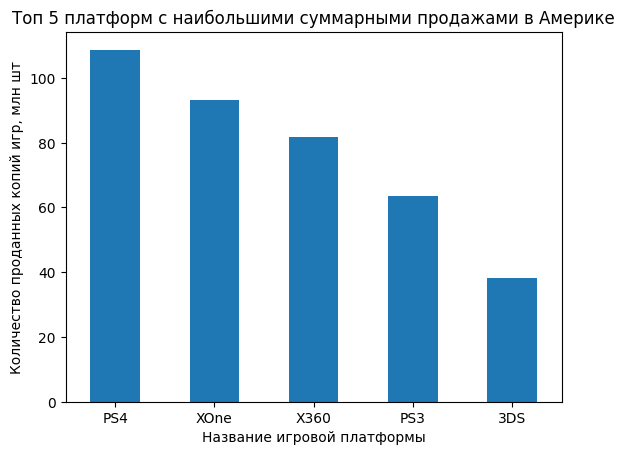

In [81]:
all_sales_top_na.plot.bar(
    y='na_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 платформ с наибольшими суммарными продажами в Америке'
);

В Америке самая популярная платформа - `PS4`, а самая непопулярная - `3DS`.

Определим топ-5 самых популярных жанров игр в Америке.

Создадим сводную таблицу.

In [82]:
genres_top_na = actual_games_data.pivot_table(
    index='genre',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [83]:
genres_top_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Визуализируем полученный топ-5 самых популярных в Америке жанров игр.

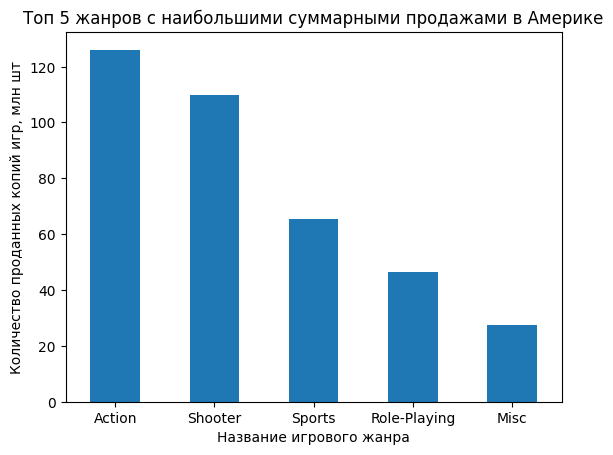

In [84]:
genres_top_na.plot.bar(
    y='na_sales',legend=False,rot=0,xlabel='Название игрового жанра',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 жанров с наибольшими суммарными продажами в Америке'
);

В Европе самым популярным жанром является `Action`. Последний по популярности жанр `-` `Misc`.

Итак, в Северной Америке самая популярная платформа `-` `PS4`, а самый популярный жанр `-` `Action`. 

Отберем все игры, вышедшие на платформе `PS4` жанра `Action` с отличными от нуля продажами в Америке.

In [85]:
action_games_ps4_na = actual_games_data[
    (actual_games_data['platform']=='PS4')&
    (actual_games_data['genre']=='Action')&
    (actual_games_data['na_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [86]:
action_games_ps4_na['rating'].value_counts()

M       33
T       23
E10+    13
E        3
Name: rating, dtype: int64

Больше всего оценок `M` и `T`.

Отберем теперь все игры, вышедшие на платформе `XOne` жанра `Action` с отличными от нуля продажами в Америке.

In [87]:
action_games_xone_na = actual_games_data[
    (actual_games_data['platform']=='XOne')&
    (actual_games_data['genre']=='Action')&
    (actual_games_data['na_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [88]:
action_games_xone_na['rating'].value_counts()

M       31
E10+    10
T        9
E        4
Name: rating, dtype: int64

Больше всего оценок M.

Таким образом, получаем, что игры с оценкой ESRB  `M` в Америке влияют на продажи. Если оценка игры будет такой, то продаж будет много.

Перейдем к Японии. Определим топ-5 самых популярных платформ.

Создадим сводную таблицу.

In [89]:
all_sales_top_jp = actual_games_data.pivot_table(
    index='platform',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [90]:
all_sales_top_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Визуализируем полученный топ-5 самых популярных в Японии игровых платформ.

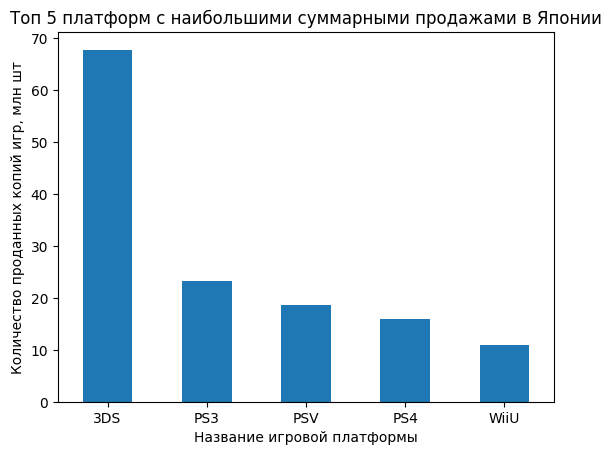

In [91]:
all_sales_top_jp.plot.bar(
    y='jp_sales',legend=False,rot=0,xlabel='Название игровой платформы',ylabel='Количество проданных копий игр, млн шт',
    title='Топ 5 платформ с наибольшими суммарными продажами в Японии'
);

* Прежде всего заметно, что продаж игр в Японии намного меньше, чем в Америке и Европе.
* Самая популярная платформа в Японии - `3DS`, а самая непопулярная - `WiiU`.

Определим топ-5 самых популярных жанров игр в Японии.

Создадим сводную таблицу.

In [92]:
genres_top_jp = actual_games_data.pivot_table(
    index='genre',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False
).head()

Посмотрим на созданную таблицу.

In [93]:
genres_top_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В Японии самым популярным жанром является `Role-Playing`. Самый непопулярный жанр `-` `Shooter`.	

Итак, в Японии самая популярная платформа `-` `3DS`, а самый популярный жанр `-` `Role-Playing`.

Отберем все игры, вышедшие на платформе `3DS` жанра `Role-Playing` с отличными от нуля продажами в Японии.

In [94]:
rp_games_ds_jp = actual_games_data[
    (actual_games_data['platform']=='3DS')&
    (actual_games_data['genre']=='Role-Playing')&
    (actual_games_data['jp_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [95]:
rp_games_ds_jp['rating'].value_counts()

T       8
E10+    5
M       3
E       1
Name: rating, dtype: int64

Больше всего оценок `T` и `E10+`.

Отберем теперь все игры, вышедшие на платформе `PS3` жанра `Role-Playing` с отличными от нуля продажами в Японии.

In [96]:
rp_games_ps3_jp = actual_games_data[
    (actual_games_data['platform']=='PS3')&
    (actual_games_data['genre']=='Role-Playing')&
    (actual_games_data['jp_sales']!=0)
]

Создадим таблицу с количеством различных оценок ESRB.

In [97]:
rp_games_ps3_jp['rating'].value_counts()

T       19
M        5
E10+     1
Name: rating, dtype: int64

Больше всего оценок `T`.

Таким образом, получаем, что игры с оценкой ESRB  `T` в Японии влияют на продажи. Если оценка игры будет такой, то продаж будет много.

## Проверка гипотез

**Проверим, можно ли говорить о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC`одинаковые. Сформулируем гипотезы.**

Нулевая гипотеза:  средние пользовательские рейтинги платформ `Xbox One` и `PC` равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны.

Проверим гипотезы с помощью теста о равенстве средних двух генеральных совокупностей.

In [98]:
alpha = 0.01 # задаём уровень статистической значимости равным 1%

sample_xone = actual_games_data[actual_games_data['platform']=='XOne']['user_score'] 
sample_xone = sample_xone.dropna()
# формируем выборку рейтингов пользователей для игр платформы Xbox One 
sample_pc = actual_games_data[actual_games_data['platform']=='PC']['user_score'] 
sample_pc = sample_pc.dropna()
# формируем выборку рейтингов пользователей для игр платформы PC 

result = st.ttest_ind(sample_xone,sample_pc,equal_var=False) # проводим тест

print('p-значение:', result.pvalue) # выводим на экран p-значение

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в сторону альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

**Проверим, можно ли говорить о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные. Сформулируем гипотезы.**

Нулевая гипотеза:  средние пользовательские рейтинги жанров `Action` и `Sports` равны.

Альтернативная гипотеза:  средние пользовательские рейтинги жанров `Action` и `Sports` не равны.

Проверим гипотезы с помощью теста о равенстве средних двух генеральных совокупностей.

In [99]:
alpha = 0.01 # задаём уровень статистической значимости равным 1%

sample_action = actual_games_data[actual_games_data['genre']=='Action']['user_score'] 
sample_action = sample_action.dropna()
# формируем выборку рейтингов пользователей для игр жанра Action 
sample_sports = actual_games_data[actual_games_data['genre']=='Sports']['user_score'] 
sample_sports = sample_sports.dropna()
# формируем выборку рейтингов пользователей для игр жанра Sports

results = st.ttest_ind(sample_action,sample_sports,equal_var=False) # проводим тест

print('p-значение:', results.pvalue) # выводим на экран p-значение

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в сторону альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу в сторону альтернативной


Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В результате исследования были получены следующие результаты:
* больше всего игр выпускалось в 2008 и в 2009 году;
* характерный срок существования старой платформы до её замены новой платформой примерно 10 лет;
* актуальным периодом можно считать период с 2013 по 2016 год;
* потенциально прибыльные платформы - XOne и PS4;
* для каждой из платформ есть такие игры, которые имеют на фоне других очень большое количество проданных глобально копий;
* чем выше оценка критиков, тем больше продаж. Суммарные продажи не зависят от оценки пользователей;
* cамые прибыльные жанры игр - это `Action`, `Sports` и `Shooter`; 
* жанры `Action` и `Strategy` сильно выделяются на фоне других по количеству продаж копий игр в большую и меньшую стороны соответственно. Игры жанра `Action` продаются в очень большом количестве, а игры жанра `Strategy` - в малом;
* жанры `Shooter` и `Adventure` сильно выделяются на фоне других по среднему количеству продаж копий игр в большую и меньшую стороны соответственно. Игры жанра `Shooter` в среднем продаются лучше всего, а игры жанра `Adventure` - хуже всего;
* в Европе самая популярная платформа `-` `PS3`, а самый популярный жанр `-` `Action`, игры с оценками ESRB M и T в Европе влияют на продажи;
* в Северной Америке самая популярная платформа `-` `PS4`, а самый популярный жанр `-` `Action`, игры с оценкой ESRB M в Америке влияют на продажи;
* в Японии самая популярная платформа `-` `3DS`, а самый популярный жанр `-` `Role-Playing`, игры с оценкой ESRB T в Японии влияют на продажи;
* есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны;
* есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.